In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PyEyeSim import EyeData

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [7]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


dataset size:  (258562, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:280: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

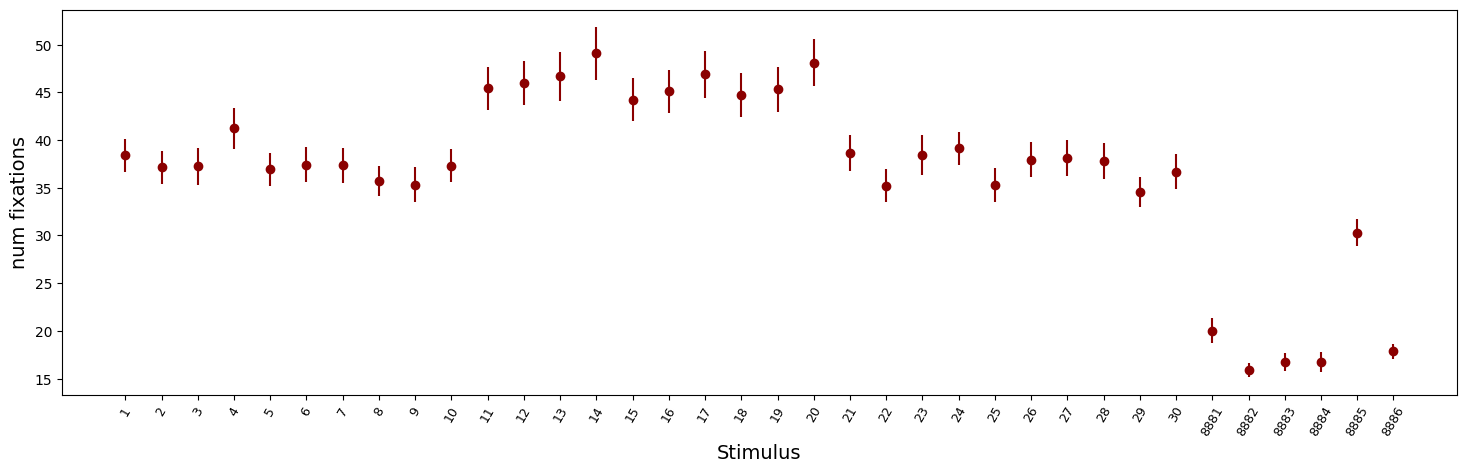

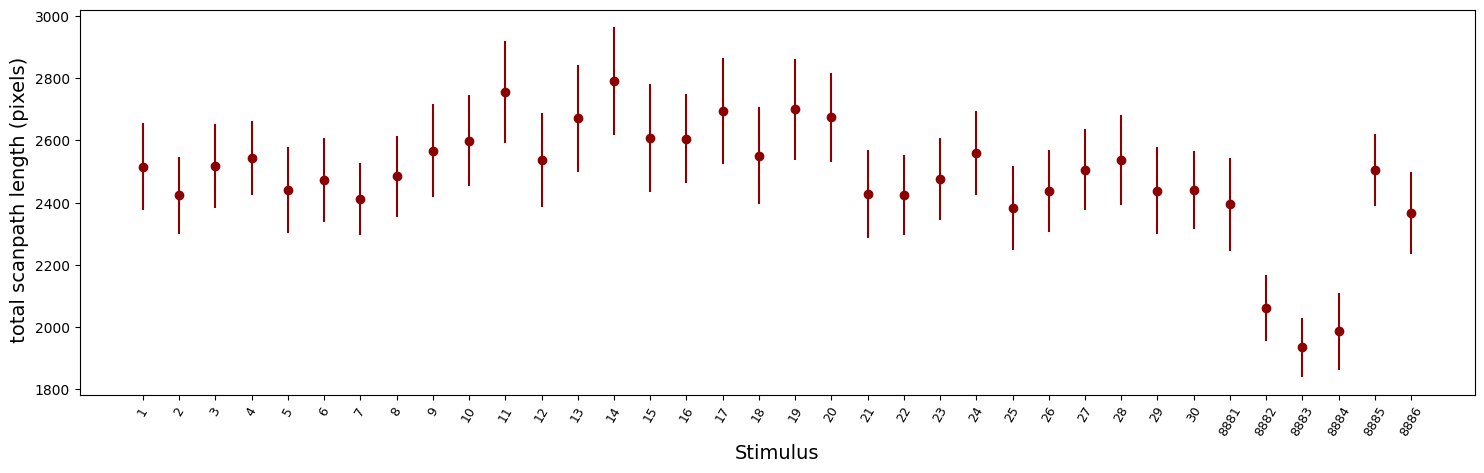

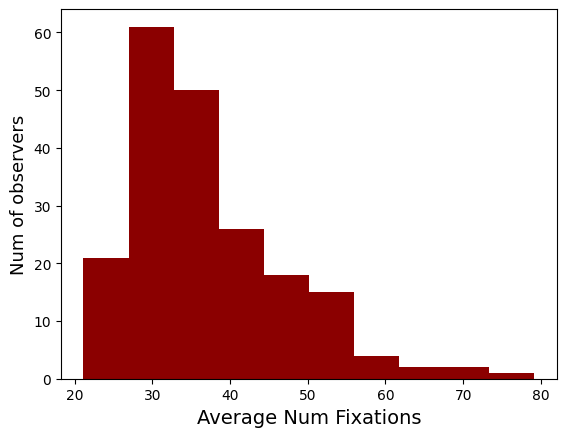

In [8]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [9]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[x] = +1
            set_subj.add(x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

10 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 28, 31, 32]
26 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 2, 13: 3, 14: 1, 16: 2, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 2, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
29 Subjects with missing data: {115: 1, 43: 1, 53: 1, 10: 1, 15: 1, 17: 1, 91: 1, 94: 1, 116: 1, 32: 1, 83: 1, 20: 1, 41: 1, 96: 1, 55: 1, 44: 1, 82: 1, 14: 1, 2: 1, 66: 1, 73: 1, 58: 1, 25: 1, 99: 1, 64: 1, 8: 1, 27: 1, 76: 1, 80: 1}


Here we check for the Munich subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Over 36 stimuli 26 have at least one subject that have not seen them.

Over 117 subject only 20 have not seen at least one stimuli (actually every of these subjects have got a proble with one stimulus).

We can consider to remove this 20 subject from the dataset (that correspond to around 17% of the total), or consider to use only the 10 stimui that have full data for every subject, or every time that we randomly select a combination of stimulus/subject check if the subject has seen the stimulus and if not substitute it with another one.

---

In [10]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [11]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0
WhichCN = WhichCN.astype(int)
WhichCN

array([1, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 1, 1, 4, 1, 4, 4, 3, 4, 0, 1, 1, 4, 4, 2, 1, 1, 2, 1, 4, 1,
       2, 3, 1, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 1, 1, 1, 2, 3, 4, 4, 1, 2,
       4, 2, 1, 2, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 4, 2, 1, 2, 3, 3, 2,
       4, 1, 1, 3, 3, 1, 0, 1, 4, 4, 2, 0, 4, 4, 4, 3, 4, 2, 2, 1, 4, 4,
       4, 4, 4, 4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 2,
       1, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 4, 1, 1, 0, 4, 1, 4,
       1, 4, 4, 4, 4, 3, 1, 1, 4, 3, 3, 3, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3,
       3, 2, 4, 4, 4, 4, 1, 3, 0, 0, 3, 2, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4,
       4, 0])

In [12]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 4, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0,
       1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2,
       2, 1, 3, 3, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       3, 4])

In [ ]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self, WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(self.Conds):
        if np.isnan(c):
            continue
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()
    
    for gr1 in range(len(self.Conds)):
        if np.isnan(self.Conds[gr1]):
            continue
        for gr2 in range(len(self.Conds)):
            if np.isnan(self.Conds[gr2]):
                continue
            if gr1 < gr2:
                print()
                t,p=stats.ttest_ind(Entrs[gr1],Entrs[gr2])
                print(' ')
                print('Overall group differences: ',self.Conds[gr1],'vs',self.Conds[gr2] )
                print('Entropy t=',np.round(t,4),', p=',np.round(p,4))
                #if pglib:
                 #   pg.ttest(Fixies[0],Fixies[1],paired=False)
                #else:
                t,p=stats.ttest_ind(Fixies[gr1],Fixies[gr2])
                print('Num Fix t=',np.round(t,4),', p= ',np.round(p,4))
                t,p=stats.ttest_ind(ScanpLs[gr1],ScanpLs[gr2])
                
            
                print('Scanpath lengths t=',np.round(t,4),', p=',np.round(p,4))
                t,p=stats.ttest_ind(SaccAmpls[gr1],SaccAmpls[gr2])
            
                print('Saccade amplitudes t=',np.round(t,4),', p=',np.round(p,4))
                print(' ')

    
    return 

!runnning between group comparison
0 1 num participants:  52
0 1 Num fix=  45.96 +/- 10.34
0 1 max num fix=  79.17
0 1 min num fix=  30.09
0 1 Entropy=  2.75 +/- 0.17
0 1 tot scanpath len =  2809.49 +/- 548.9 pix
0 1 saccade amplitude =  72.86 +/- 15.24 pix

1 2 num participants:  29
1 2 Num fix=  42.65 +/- 6.43
1 2 max num fix=  54.62
1 2 min num fix=  30.86
1 2 Entropy=  2.74 +/- 0.16
1 2 tot scanpath len =  2639.17 +/- 405.14 pix
1 2 saccade amplitude =  74.53 +/- 15.02 pix

2 3 num participants:  45
2 3 Num fix=  32.0 +/- 5.26
2 3 max num fix=  51.34
2 3 min num fix=  24.47
2 3 Entropy=  2.62 +/- 0.17
2 3 tot scanpath len =  2342.09 +/- 518.78 pix
2 3 saccade amplitude =  85.38 +/- 20.54 pix

3 4 num participants:  67
3 4 Num fix=  30.52 +/- 4.58
3 4 max num fix=  43.44
3 4 min num fix=  21.14
3 4 Entropy=  2.64 +/- 0.17
3 4 tot scanpath len =  2225.23 +/- 492.38 pix
3 4 saccade amplitude =  82.66 +/- 18.09 pix


 
Overall group differences:  1.0 vs 2.0
Entropy t= 0.3052 , p= 0.761

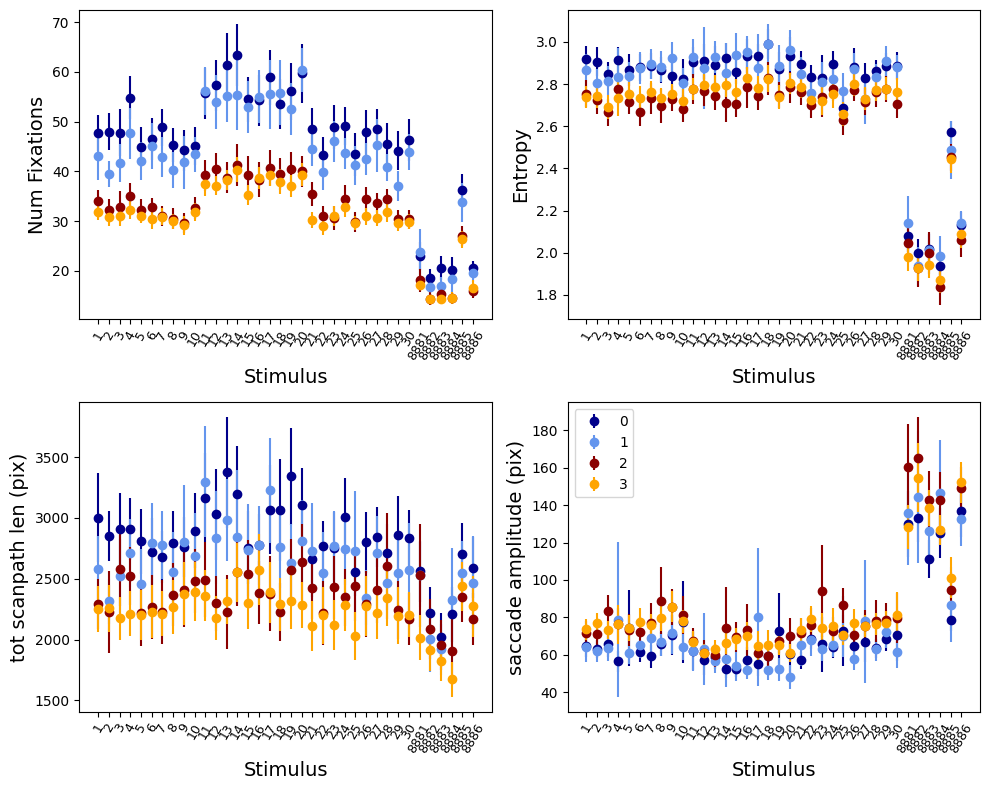

In [ ]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1','2','3'])

In [ ]:
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 4, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0,
       1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2,
       2, 1, 3, 3, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       3, 4])

## HMM

In [13]:
map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]

In [14]:
FixData2 = FixData[~FixData['subject'].str.startswith('P')]
FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]

In [15]:
DyslexiaDat2=EyeData(FixData2,sizeX,sizeY)
DyslexiaDat2.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')

dataset size:  (115648, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 88 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  88 observers and  36  stimuli.


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:280: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  36.51  +/-  9.43
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  3168
Mean X location:  552.7  +/-  16.6  pixels
Mean Y location:  519.1  +/-  12.6  pixels
Mean saccade  amplitude:  88.2  +/-  17.7  pixels
Mean scanpath  length:  2725.1  +/-  412.2  pixels


In [16]:
tot_subj = DyslexiaDat2.subjects

In [17]:
WhichC, WhichCN = DyslexiaDat2.GetGroups('Group')

Conditions [1. 2. 3. 4.]


In [18]:
subj_group_1 = [DyslexiaDat2.subjects[s] for s in np.where(WhichC == 0)[0] if DyslexiaDat2.subjects[s]] #Combined Reading and Spelling Deficit
subj_group_2 = [DyslexiaDat2.subjects[s] for s in np.where(WhichC == 1)[0] if DyslexiaDat2.subjects[s]] #Isolated Reading Deficit
subj_group_3 = [DyslexiaDat2.subjects[s] for s in np.where(WhichC == 2)[0] if DyslexiaDat2.subjects[s]] #Isolated Spelling Deficit
subj_group_4 = [DyslexiaDat2.subjects[s] for s in np.where(WhichC == 3)[0] if DyslexiaDat2.subjects[s]] #Typical readers

In [19]:
# Ensure balanced classes in train and test sets
train_participants = subj_group_4 + subj_group_1
test_participants = subj_group_3 + subj_group_2

# Generate labels for train and test sets
train_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in train_participants])
test_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in test_participants])

In [20]:
from IPython.utils import io
from copy import deepcopy

def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    with io.capture_output() as _:
        train_model = self.models_pipeline(stimuli, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=test_participants)
    model_g0 = deepcopy(train_model[0][0][0])
    model_g1 = deepcopy(train_model[1][0][0])
    return model_g0, model_g1

In [21]:
def evaluation(self, model_g0, model_g1, test_participants, test_labels, conf_matrix):
    accuracy = []
    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]

        X0, Y0, l0 = self.get_data(13, subject=int(s))
        res_0 = model_g0.bic(np.column_stack((X0, Y0)),l0)/l0
        res_1 = model_g1.bic(np.column_stack((X0, Y0)),l0)/l0
        if res_0 < res_1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif res_0 < res_1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif res_0 > res_1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif res_0 > res_1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
    return accuracy, conf_matrix

In [407]:
test_labels

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [408]:
test_labels = np.array([0 if label == 2 else 1 for label in test_labels])

In [409]:
test_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
conf_matrix = np.zeros((2, 2))

model_g0, model_g1 = train_HMM(DyslexiaDat2, test_participants, [0,3], 13, [8], 50, 'tied')
acc, conf = evaluation(DyslexiaDat2, model_g0, model_g1, test_participants, test_labels, conf_matrix)
conf_matrix = conf
print(f'Accuracy: {np.mean(acc)}')
print(f'Total confusion matrix:\n{conf_matrix}')

In [ ]:
test_labels = np.array([0 if label == 1 else 1 for label in test_labels])

In [ ]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
conf_matrix = np.zeros((2, 2))

model_g0, model_g1 = train_HMM(DyslexiaDat2, test_participants, [0,3], 13, [8], 50, 'tied')
acc, conf = evaluation(DyslexiaDat2, model_g0, model_g1, test_participants, test_labels, conf_matrix)
conf_matrix = conf
print(f'Accuracy: {np.mean(acc)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Accuracy: 0.35294117647058826
Total confusion matrix:
[[ 4. 12.]
 [32. 20.]]


## HMM multiple stimuli

In [27]:
# Ensure balanced classes in train and test sets
train_participants = subj_group_4 + subj_group_1
test_participants = subj_group_3 + subj_group_2

# Generate labels for train and test sets
train_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in train_participants])
test_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in test_participants])

In [28]:
from copy import deepcopy
def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    models_g0 = []
    models_g1 = []
    for stim in stimuli:
        with io.capture_output() as _:
            train_model = self.models_pipeline(stim, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=test_participants)
        models_g0.append(deepcopy(train_model[0][0][0]))
        models_g1.append(deepcopy(train_model[1][0][0]))
        
    return models_g0, models_g1

In [29]:
def evaluation(self, stimuli, models_g0, models_g1, test_participants, test_labels):
    accuracy = []
    conf_matrix = np.zeros((2, 2))
    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]
        vote_g0 = 0
        vote_g1 = 0
        for s_idx,stim in enumerate(stimuli):
            X0, Y0, l0 = self.get_data(stim, subject=int(s))
            res_0 = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
            res_1 = models_g1[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0

            if res_0 < res_1:
                vote_g0 += 1
            else:
                vote_g1 += 1

        if vote_g0 > vote_g1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif vote_g0 > vote_g1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif vote_g0 < vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 < vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        
    return accuracy, conf_matrix

In [30]:
test_labels = np.array([0 if label == 2 else 1 for label in test_labels])

In [ ]:
conf_matrix = np.zeros((2, 2))
stimuli = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30]
models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,3], stimuli, [8], 50, 'tied')
acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels)
conf_matrix = conf
print(f'Accuracy: {np.mean(acc)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Accuracy: 0.5882352941176471
Total confusion matrix:
[[ 5.  3.]
 [11. 15.]]


In [32]:
test_labels = np.array([0 if label == 1 else 1 for label in test_labels])

In [34]:
conf_matrix = np.zeros((2, 2))
stimuli = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30]
models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,3], stimuli, [8], 50, 'tied')
acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels)
conf_matrix = conf
print(f'Accuracy: {np.mean(acc)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Accuracy: 0.47058823529411764
Total confusion matrix:
[[ 3.  3.]
 [15. 13.]]


---

In [35]:
# Ensure balanced classes in train and test sets
train_participants = subj_group_4 + subj_group_1
test_participants = subj_group_3 + subj_group_2

# Generate labels for train and test sets
train_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in train_participants])
test_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in test_participants])

In [36]:
test_labels = np.array([0 if label == 2 else 1 for label in test_labels])

In [37]:
conf_matrix = np.zeros((2, 2))
stimuli = [1,2,3,4,5,6,7,8,9,10,22,23,24,25,26,27,28,29,30]
models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,3], stimuli, [8], 50, 'tied')
acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels)
conf_matrix = conf
print(f'Accuracy: {np.mean(acc)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Accuracy: 0.5588235294117647
Total confusion matrix:
[[ 4.  3.]
 [12. 15.]]


---